# **Student Performance Analysis**

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import geopandas as gpd

In [262]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 


In [263]:
# metadata 
# print(student_performance.metadata) 
  
# variable information 
# print(student_performance.variables) 

In [264]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [268]:
y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


## **Abstract**

The background of this study is from student achievement in secondary educaiton of two Portuguese schools. The goal of my study is to determine what variables have the greatest impact on students' final grade in an attempt to find ways to help students who are academically struggling find ways to potentially improve their grades. The methods I used to help come up with conclusions is visualizations such as heatmaps, barplots, boxplots, and scatterplots. I also then used a linear regression model to predict the values relationship with final grade (G3), then comparing it to the actual vales as well. The outcomes I got were that there are some correlations that stood out, such as freetime and a higher final grade have a negative correlation. My model also was pretty accurate and came to similar conclusions. Overall, the societal impact this study has is it can help struggling students recognize why their grades might be being impacted, leading to lifestyle changes they can make to help improve them.

## **Introduction of the Data Set and Variables**

This dataset is on student achievement in secondary education of two Portuguese schools. The data was collected using school reports and questionnaires. The datasets provided regard the performance in two subjects: Mathematics and Portuguese language. The shape of this dataset is that there are 649 instances/responses, and 30 features/variables. Below, I have displayed the datatypes for each variable. It contains catergorical/object, integer, and binary data types...

Citation: Cortez, P. (2008). Student Performance [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

In [269]:
print("Feature Data Types:")
print(X.dtypes)

Feature Data Types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
dtype: object


In [270]:
print("Target Data Types:")
print(y.dtypes)

Target Data Types:
G1    int64
G2    int64
G3    int64
dtype: object


## **Data Cleaning and Preprocessing**

**Remove G1 (first period grade) and G2 (second period grade) from the target variables, as for I want to just focus on G3 (final grade)**

In [271]:
y = y["G3"]

In [272]:
y.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

**Checking for missing values, then remove them if any exist**

In [273]:
print("Missing values in features:")
print(X.isnull().sum())

print("\nMissing values in target:")
print(y.isnull().sum())


Missing values in features:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

Missing values in target:
0


**Converting categorical variables to numerical**

In [274]:
categorical_columns = X.select_dtypes(include = "object").columns
X = pd.get_dummies(X, columns = categorical_columns, drop_first = True)

In [275]:
# Check that variables properly converted to numerical
print(X.dtypes)

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
school_MS             bool
sex_M                 bool
address_U             bool
famsize_LE3           bool
Pstatus_T             bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
Fjob_teacher          bool
reason_home           bool
reason_other          bool
reason_reputation     bool
guardian_mother       bool
guardian_other        bool
schoolsup_yes         bool
famsup_yes            bool
paid_yes              bool
activities_yes        bool
nursery_yes           bool
higher_yes            bool
i

## **Visualization**

**Quick visual of the numerical values correlations to final grade**

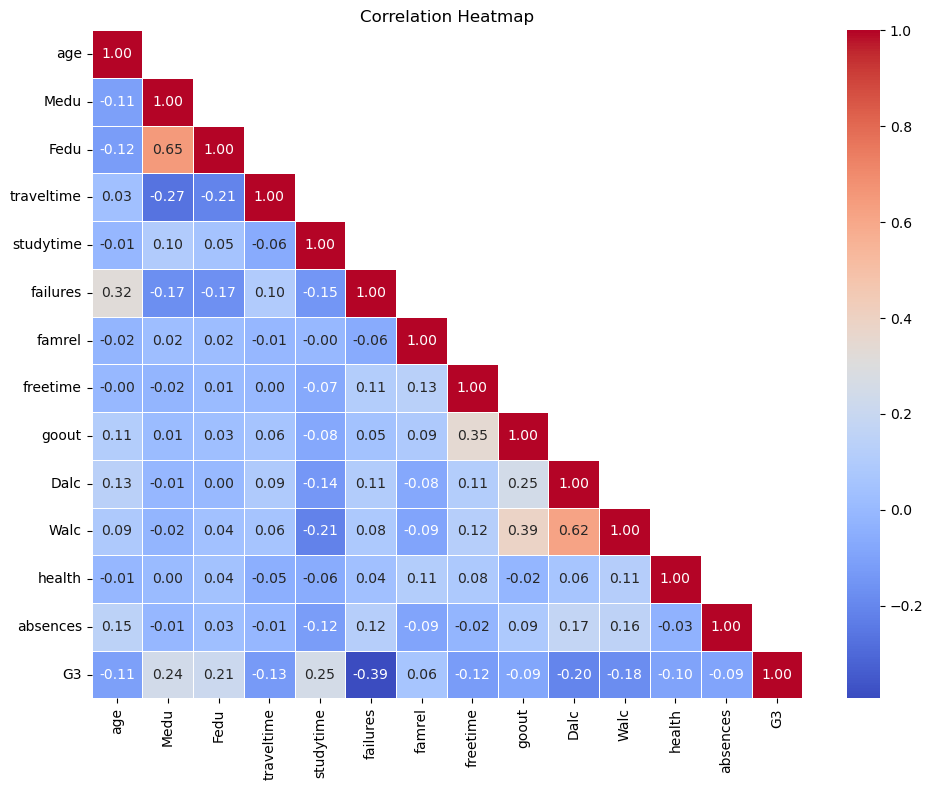

In [276]:
# Combine X and y, and select numeric columns
data = pd.concat([X, y], axis=1)
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Mask only the upper triangle, not the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


**Barplots on a few of the key variables pointed out by the heatmap**

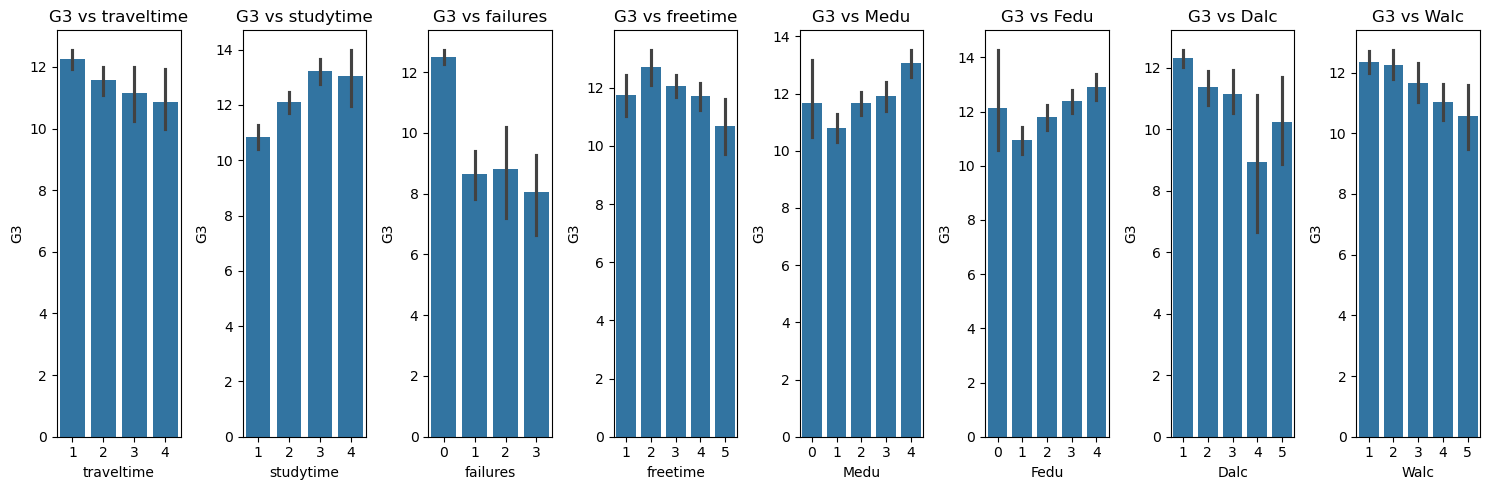

In [277]:

# Variables I want to compare with G3
variables = ['traveltime', 'studytime', 'failures', 'freetime', 'Medu', 'Fedu', 'Dalc', 'Walc']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(variables), figsize=(15, 5))

# Plot a barplot for each variable
for i, var in enumerate(variables):
    sns.barplot(x=var, y='G3', data=data, ax=axes[i])
    axes[i].set_title(f'G3 vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('G3')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



**Closer look at freetime vs final grade**

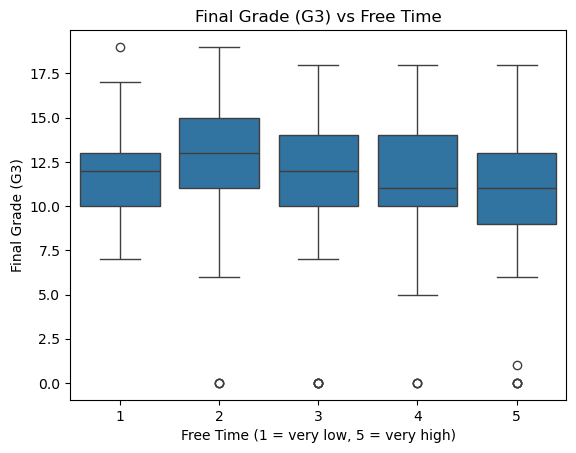

In [278]:
# Boxplot

sns.boxplot(x='freetime', y='G3', data=data)

plt.title('Final Grade (G3) vs Free Time')
plt.xlabel('Free Time (1 = very low, 5 = very high)')
plt.ylabel('Final Grade (G3)')
plt.show()


In [279]:
# Average grade values per freetime level
avg_g3_by_freetime = data.groupby('freetime')['G3'].mean().reset_index()
print(avg_g3_by_freetime)


   freetime         G3
0         1  11.733333
1         2  12.710280
2         3  12.059761
3         4  11.713483
4         5  10.691176


**Closer look at studytime vs final grade**

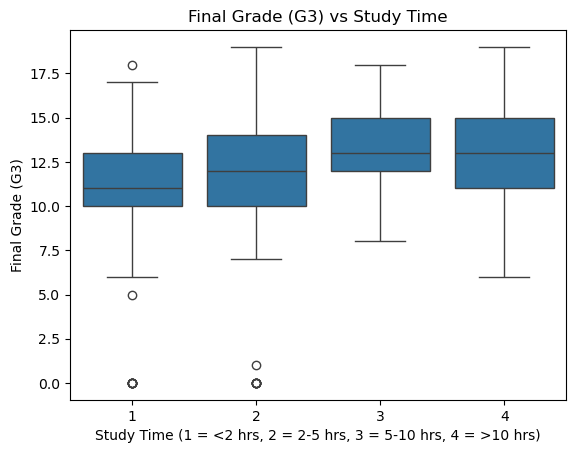

In [280]:
# Boxplot

sns.boxplot(x='studytime', y='G3', data=data)

plt.title('Final Grade (G3) vs Study Time')
plt.xlabel('Study Time (1 = <2 hrs, 2 = 2-5 hrs, 3 = 5-10 hrs, 4 = >10 hrs)')
plt.ylabel('Final Grade (G3)')
plt.show()


In [281]:
# Average grade values per study time
avg_g3_by_studytime = data.groupby('studytime')['G3'].mean().reset_index()
print(avg_g3_by_studytime)


   studytime         G3
0          1  10.844340
1          2  12.091803
2          3  13.226804
3          4  13.057143


**Now let's look at some of the categorical variables compared with final grade**

In [282]:
converted_vars = [
    'school_MS', 'sex_M', 'address_R', 'famsize_LE3', 'Pstatus_T',
    'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
    'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
    'reason_home', 'reason_other', 'reason_reputation',
    'guardian_mother', 'guardian_other',
    'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
    'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes'
]

# List of all original categorical columns one-hot encoded
categorical_vars = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]

# Get all new dummy column names by filtering for any column created from those
converted_vars = [col for col in data.columns if any(var + '_' in col for var in categorical_vars)]



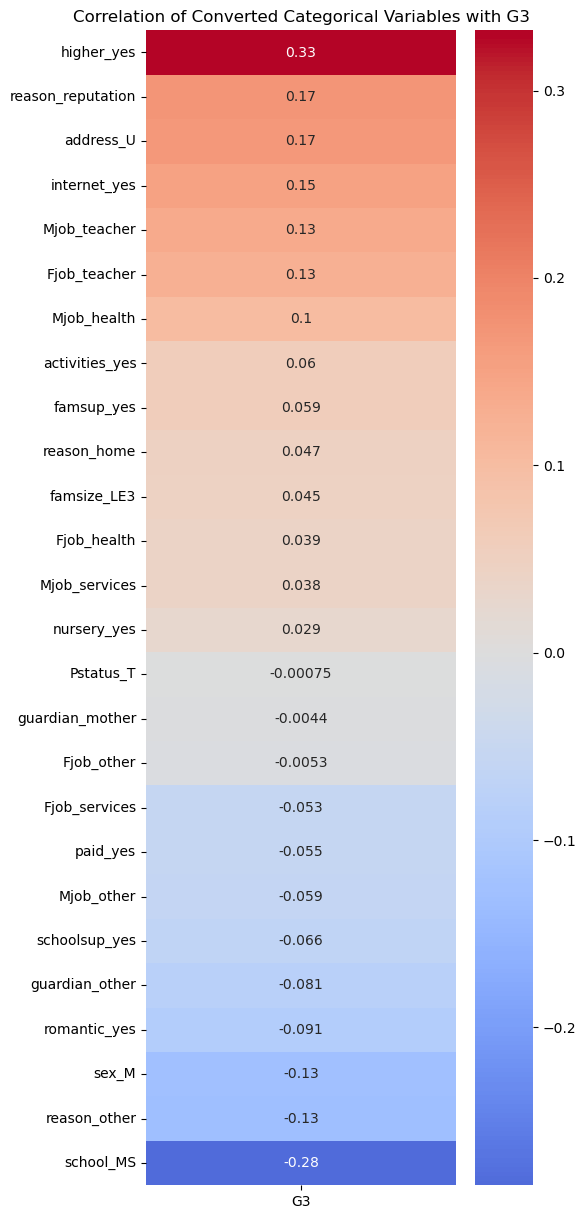

In [283]:

subset = data[converted_vars + ['G3']]
corr_subset = subset.corr(numeric_only=True)

# Correlation with G3 only
g3_corr = corr_subset[['G3']].drop('G3').sort_values(by='G3', ascending=False)

plt.figure(figsize=(5, len(g3_corr) * 0.5 + 2))
sns.heatmap(g3_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Converted Categorical Variables with G3')
plt.show()


**Closer look at some of these variables**

In [284]:
# List of selected binary categorical variables
selected_vars = ['internet_yes', 'activities_yes', 'paid_yes', 'romantic_yes', 'schoolsup_yes']

# Create a subset with these variables and G3
subset = data[selected_vars + ['G3']]


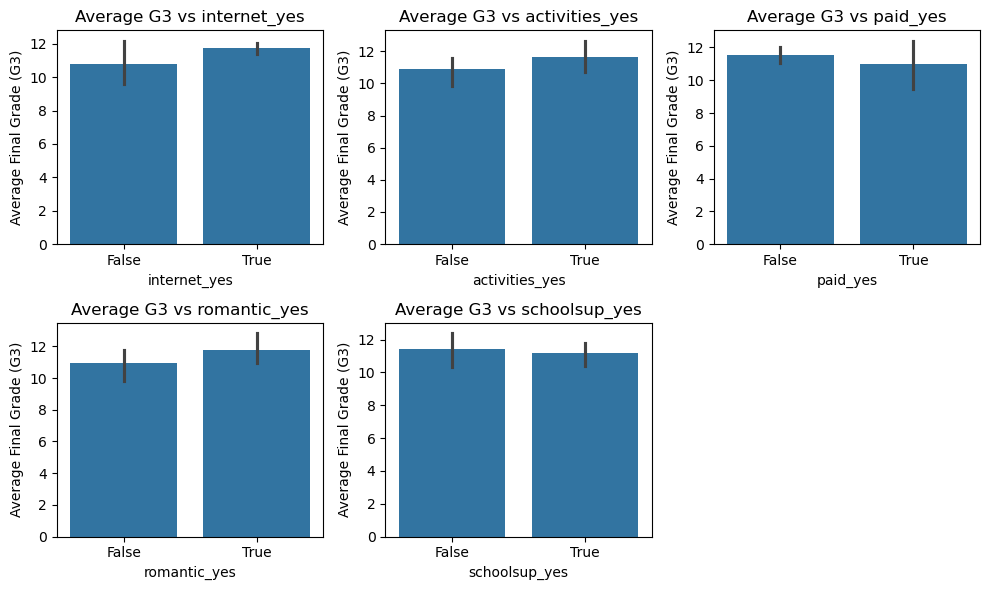

In [285]:

# Create barplot for each of the selected variables
plt.figure(figsize=(10, 6))

for i, var in enumerate(selected_vars):
    plt.subplot(2, 3, i+1)  # Create subplot grid for each variable
    sns.barplot(x=var, y='G3', data=avg_g3)
    plt.title(f'Average G3 vs {var}')
    plt.xlabel(var)
    plt.ylabel('Average Final Grade (G3)')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**Closer look at activities**

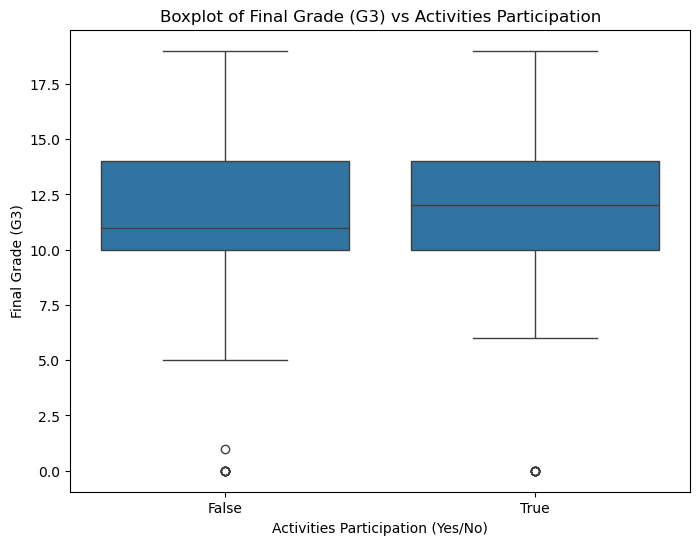

In [286]:

# Create a boxplot for G3 against activities_yes
plt.figure(figsize=(8, 6))
sns.boxplot(x='activities_yes', y='G3', data=data)
plt.title('Boxplot of Final Grade (G3) vs Activities Participation')
plt.xlabel('Activities Participation (Yes/No)')
plt.ylabel('Final Grade (G3)')
plt.show()


In [287]:
# Calculate the average G3 for True and False values of activities_yes
avg_g3_activities = data.groupby('activities_yes')['G3'].mean()
print(avg_g3_activities)


activities_yes
False    11.718563
True     12.104762
Name: G3, dtype: float64


**Closer look at extra paid classes**

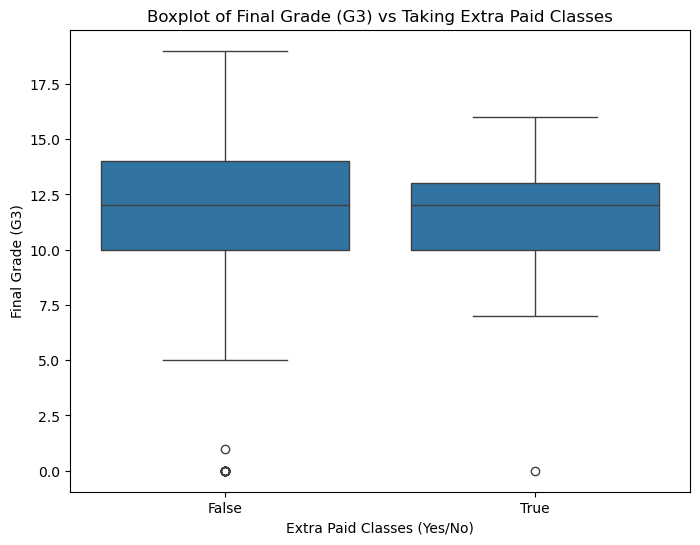

In [288]:

# Create a boxplot for G3 against paid_yes
plt.figure(figsize=(8, 6))
sns.boxplot(x='paid_yes', y='G3', data=data)
plt.title('Boxplot of Final Grade (G3) vs Taking Extra Paid Classes')
plt.xlabel('Extra Paid Classes (Yes/No)')
plt.ylabel('Final Grade (G3)')
plt.show()

In [289]:
# Calculate the average G3 for True and False values of paid_yes
avg_g3_paid = data.groupby('paid_yes')['G3'].mean()
print(avg_g3_paid)


paid_yes
False    11.950820
True     11.205128
Name: G3, dtype: float64


**Closer look at being in a relationship**

## **Linear Regression Model**

In [307]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset from UC Irvine repository
student_performance = fetch_ucirepo(id=320)

# Access the features and targets
X = student_performance.data.features
y = student_performance.data.targets

# Check the column names and datatypes
print(X.info())  # DataFrame summary including column names and datatypes
print(X.columns)  # List all feature columns
print(y.columns)  # Check the target columns (including G1, G2, G3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [308]:
# Add G1 and G2 back to the feature set as they are useful for prediction
X['G1'] = y['G1']
X['G2'] = y['G2']

# Verify the columns have been added
print(X.columns)  # Check that G1 and G2 are now part of the features


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')


C:\Users\kevin\AppData\Local\Temp\ipykernel_20748\454427666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['G1'] = y['G1']
C:\Users\kevin\AppData\Local\Temp\ipykernel_20748\454427666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['G2'] = y['G2']


In [309]:
# List of binary categorical variables based on your dataset
binary_columns = ['internet', 'activities', 'paid', 'romantic', 'schoolsup']

# Apply Label Encoding to binary columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in binary_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Check the changes after encoding
print(X[binary_columns].head())  # Ensure the encoding has been done


   internet  activities  paid  romantic  schoolsup
0         0           0     0         0          1
1         1           0     0         0          0
2         1           0     0         0          1
3         1           1     0         1          0
4         0           0     0         0          0


C:\Users\kevin\AppData\Local\Temp\ipykernel_20748\34941775.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\kevin\AppData\Local\Temp\ipykernel_20748\34941775.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\kevin\AppData\Local\Temp\ipykernel_20748\34941775.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [310]:
# Perform One-Hot Encoding for multi-class categorical columns
X = pd.get_dummies(X, columns=['Medu', 'Fedu'], drop_first=True)

# Verify the changes
print(X.head())  # Check if One-Hot Encoding worked correctly


  school sex  age address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     GP   F   18       U     GT3       A  at_home   teacher  course   mother   
1     GP   F   17       U     GT3       T  at_home     other  course   father   
2     GP   F   15       U     LE3       T  at_home     other   other   mother   
3     GP   F   15       U     GT3       T   health  services    home   mother   
4     GP   F   16       U     GT3       T    other     other    home   father   

   ...  G1  G2  Medu_1  Medu_2 Medu_3  Medu_4  Fedu_1 Fedu_2 Fedu_3  Fedu_4  
0  ...   0  11   False   False  False    True   False  False  False    True  
1  ...   9  11    True   False  False   False    True  False  False   False  
2  ...  12  13    True   False  False   False    True  False  False   False  
3  ...  14  14   False   False  False    True   False   True  False   False  
4  ...  11  13   False   False   True   False   False  False   True   False  

[5 rows x 38 columns]


In [311]:
# Features selection including G1 and G2 (already added)
selected_features = ['G1', 'G2', 'traveltime', 'studytime', 'failures', 'freetime', 
                     'Dalc', 'Walc', 'internet', 'activities', 'paid', 'romantic', 'schoolsup']

# Prepare the features and target
X_selected = X[selected_features]
y = y['G3']  # Target variable (final grade)

# Now you can proceed with model creation and evaluation...


In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE, MAPE, and R^2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the results
print(f'RMSE: {rmse}')


RMSE: 1.1716459189569504


In [325]:
# MAPE Only use non-zero target values
mask = y_test != 0
filtered_y_test = y_test[mask]
filtered_y_pred = y_pred[mask]

mape = mean_absolute_percentage_error(filtered_y_test, filtered_y_pred)
print(f"MAPE (no zero G3s): {mape:.5f}")

MAPE (no zero G3s): 0.05785


In [327]:
# R²
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = len(y_test)            # number of samples
p = X_test.shape[1]        # number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print results
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")


R²: 0.8592
Adjusted R²: 0.8435


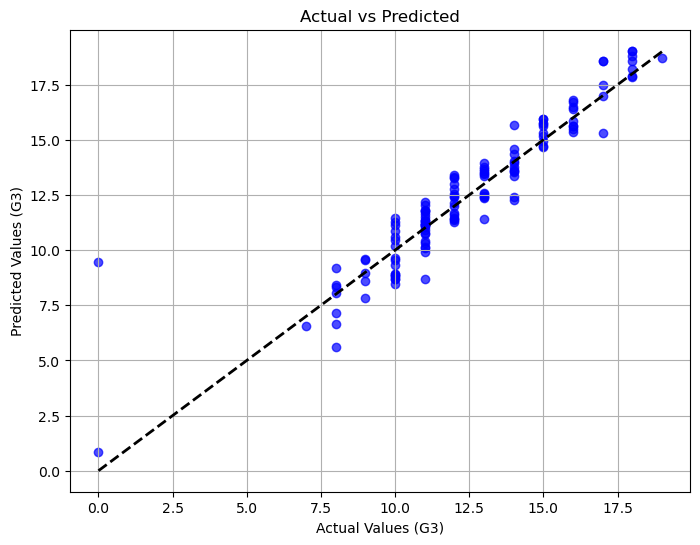

In [320]:
# Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect prediction
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values (G3)')
plt.ylabel('Predicted Values (G3)')
plt.grid(True)
plt.show()